In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

heart_disease = fetch_ucirepo(id=45)


X = heart_disease.data.features
y = heart_disease.data.targets


imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


y_binary = y['num'].apply(lambda x: 1 if x > 0 else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully loaded and preprocessed.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

C:\Users\Shaarukesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data successfully loaded and preprocessed.
Training set shape: (242, 13)
Testing set shape: (61, 13)


--- Random Forest Classifier ---
Accuracy: 0.8852

Classification Report:
                 precision    recall  f1-score   support

     No Disease       0.96      0.82      0.89        33
Disease Present       0.82      0.96      0.89        28

       accuracy                           0.89        61
      macro avg       0.89      0.89      0.89        61
   weighted avg       0.90      0.89      0.89        61



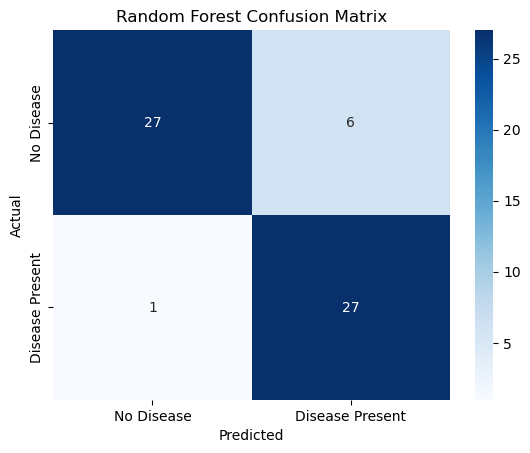

In [4]:
#Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease Present']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease Present'], yticklabels=['No Disease', 'Disease Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


--- Gradient Boosting Classifier ---
Accuracy: 0.8525

Classification Report:
                 precision    recall  f1-score   support

     No Disease       0.93      0.79      0.85        33
Disease Present       0.79      0.93      0.85        28

       accuracy                           0.85        61
      macro avg       0.86      0.86      0.85        61
   weighted avg       0.86      0.85      0.85        61



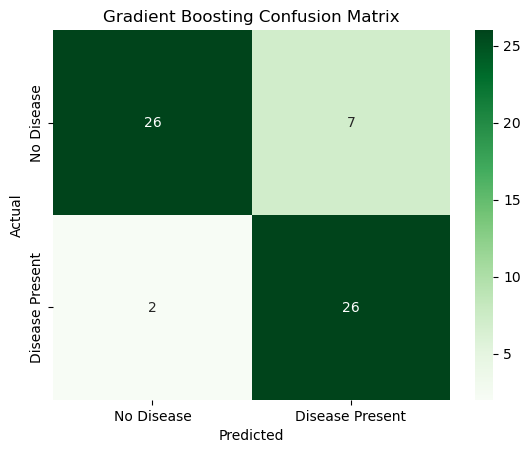

In [7]:
#Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("\n--- Gradient Boosting Classifier ---")
print(f"Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Disease', 'Disease Present']))

cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Disease', 'Disease Present'], yticklabels=['No Disease', 'Disease Present'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()